In [1]:
import pandas as pd
import os
import pickle
import glob
from auxiliary import *

In [2]:
%matplotlib inline

In [3]:
# set up data stream
SNRs =['SDT']
mainDir = '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/'
subDirs = ['DATA/Pace_170224_SDT/']
filePattern = 'S20031932003196.L3b_4D*'
saveDirs = [os.path.join(mainDir,subDir) for subDir in subDirs]
fileList = [glob.glob(os.path.join(mainDir, subDir,
                                   filePattern))[0] for subDir in subDirs]

In [4]:
simDict = {snr:file for snr,file in zip(SNRs, fileList)}

In [5]:
ptiles = ['50', '70', '80', '90', '95']
rhoUncPtileDict = dict.fromkeys(SNRs)
for snr in SNRs:
    rhoUncPtileDict[snr] = dict.fromkeys(ptiles)
    # Get data needed in form of a dict
    if simDict[snr]:
        print('processing %s' % simDict[snr])
        _, rhoUncDict,_ = GetDataDicts(fp=simDict[snr])
        for ptile in ptiles:
            rhoUncPtileDict[snr][ptile] = GetPtileDict(rhoUncDict, ptile=int(ptile)/100)

processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/Pace_170224_SDT/S20031932003196.L3b_4D_SU6.nc


In [6]:
# Now I need to plot these percentiles for each NIR SNR Scenarios:
pn = pd.Panel(rhoUncPtileDict)

In [7]:
pn['SDT']

,50,70,80,90,95
412,0.000547,0.000632,0.000712,0.000836,0.000942
443,0.000453,0.000522,0.000584,0.000685,0.000779
490,0.000360,0.000408,0.000452,0.000526,0.000591
510,0.000330,0.000371,0.000408,0.000471,0.000528
555,0.000260,0.000289,0.000318,0.000366,0.000412
670,0.000113,0.000129,0.000143,0.000168,0.000188


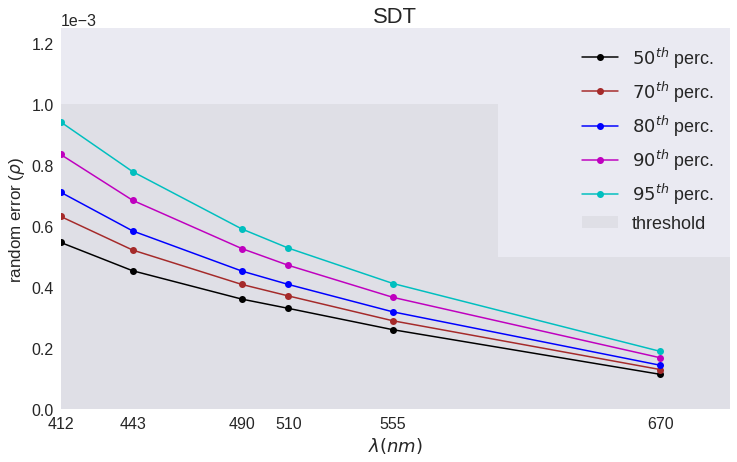

In [8]:
for scenario,savedir in zip(SNRs,saveDirs):
    df = pn[scenario]
    PlotPtiles2(df, ptiles, title=scenario, 
               savepath=os.path.join(savedir,'PaceSNR_sim_%s_ptiles_WP2.png'
                                     % scenario), redThresh=5e-4, ymax=1.25e-3,
               drawflhroi=False)

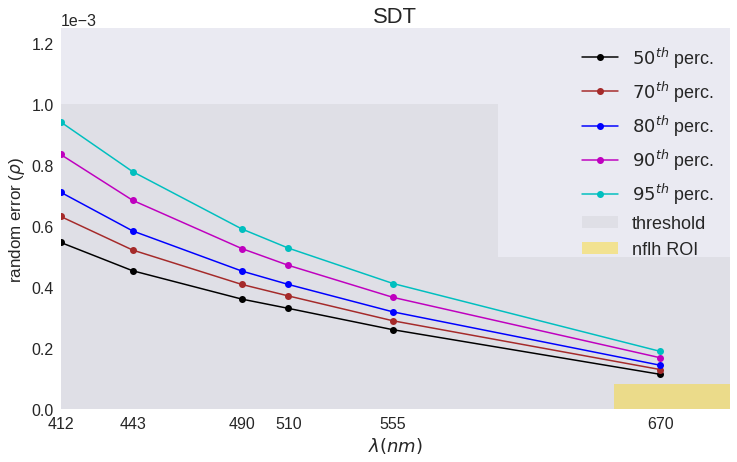

In [17]:
for scenario,savedir in zip(SNRs,saveDirs):
    df = pn[scenario]
    PlotPtiles2(df, ptiles, title=scenario, 
               savepath=os.path.join(savedir,'PaceSNR_sim_%s_ptiles_new.png'
                                     % scenario), redThresh=5e-4, ymax=1.25e-3)

### UPDATE: 2/20/17
Jeremy wants **baseline** plot with 8e-4 subred threshold box and 4e-4 for redThreshold.
I'll adjust the max plot height for ymax=1.2

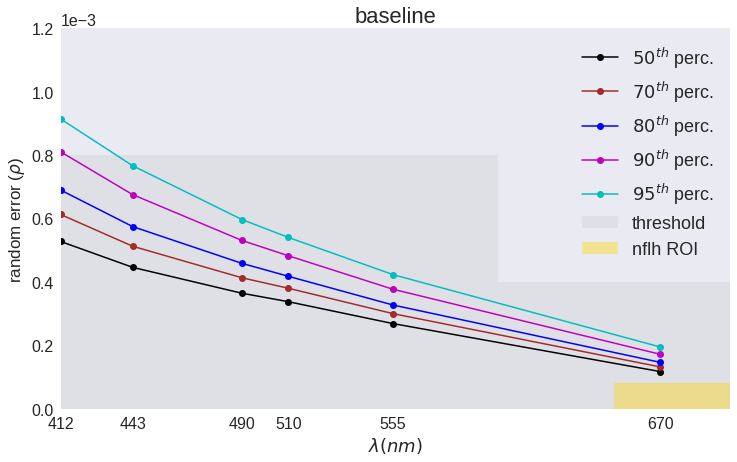

In [12]:
scenario = 'baseline'
PlotPtiles2(pn[scenario],ptiles,title=scenario,
            savepath = os.path.join(mainDir,
                                    'DATA/Pace_170217/PaceSNR_sim_%s_ptiles_new.png'),
           subRedThresh=8e-4, redThresh=4e-4, ymax=1.2e-3)

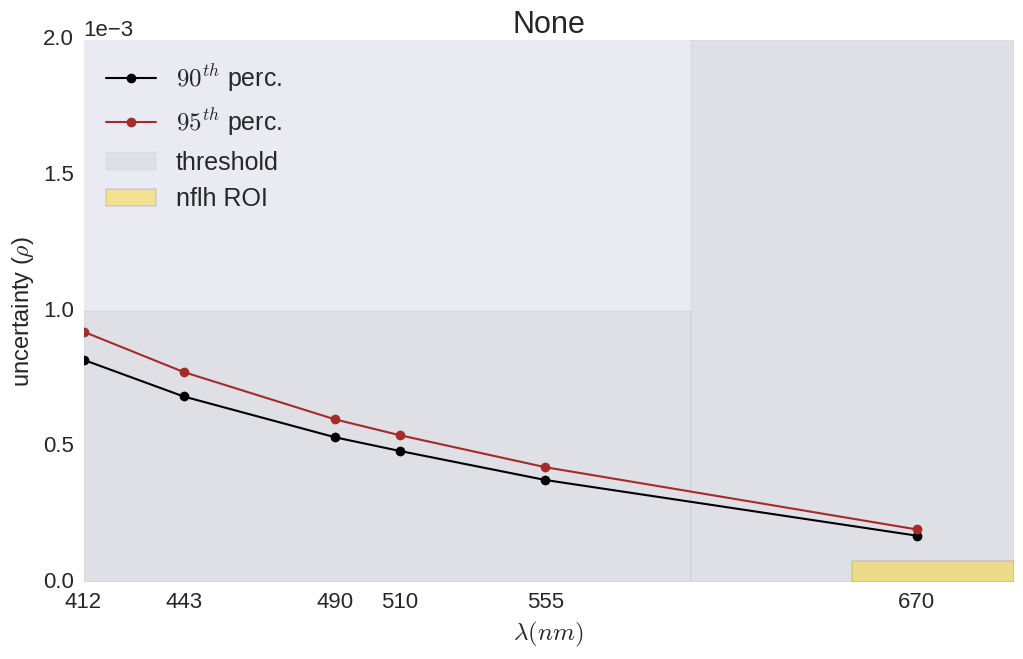

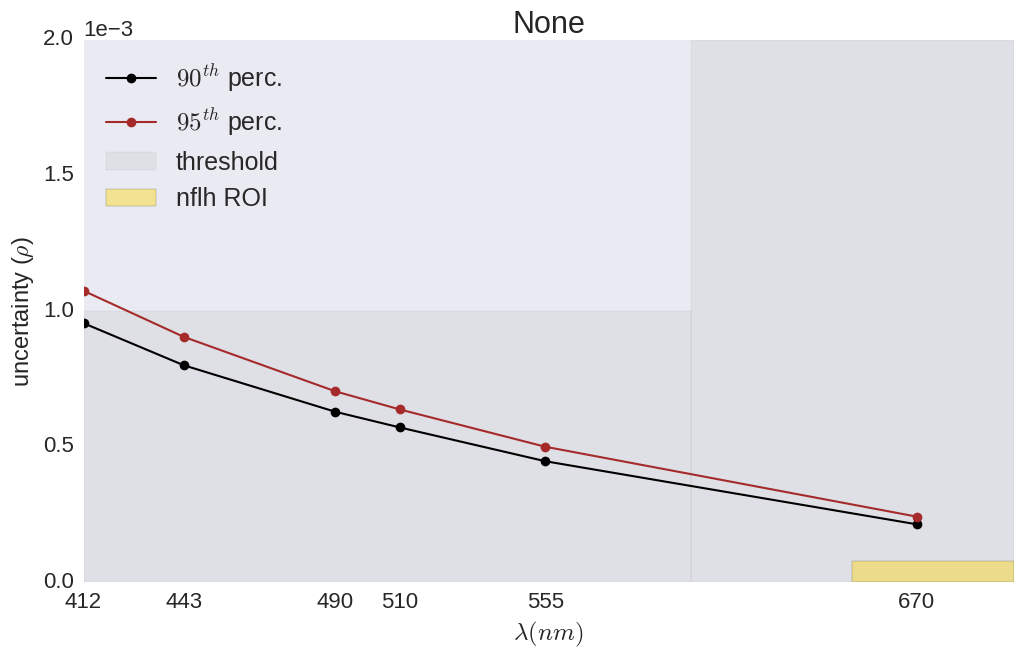

In [11]:
for scenario in SNRs:
    df = pn[scenario]
    PlotPtiles(df, ['90', '95'], savepath='PaceSNR_sim_%s_90_95ptiles.png' % (scenario))

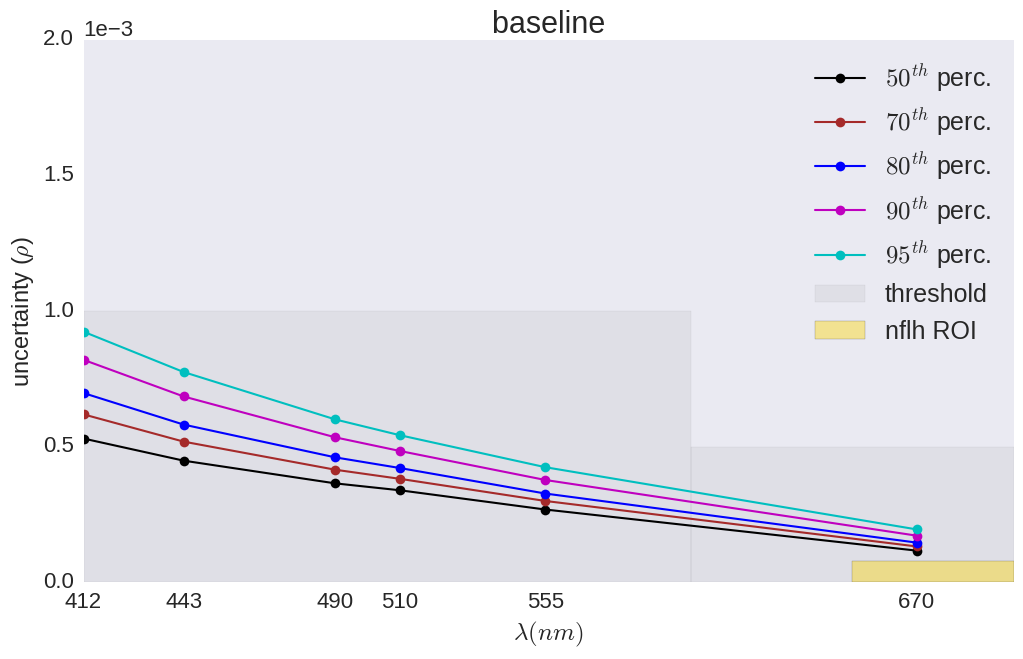

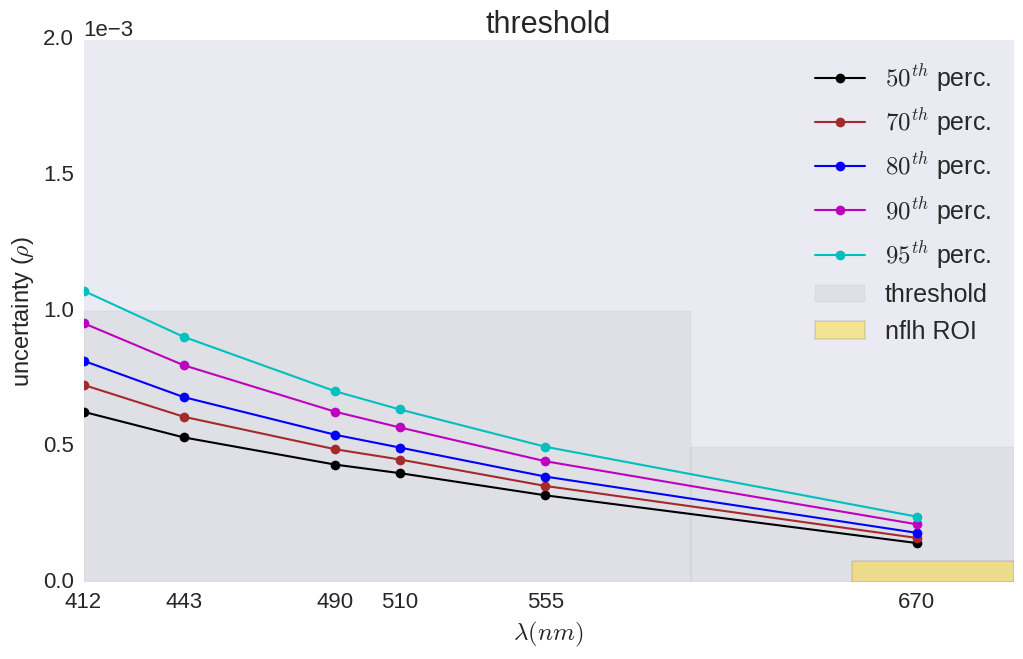

In [9]:
for scenario in SNRs:
    df = pn[scenario]
    PlotPtiles2(df, ptiles, title=scenario, 
               savepath='PaceSNR_sim_%s_ptiles.png' % scenario, axYmaxBase=1e-3,
               redThresh=5e-4)